This notebook provides an example of how to use the `poopy` package to access historical CSO discharge monitoring data provided by water companies.

First, we import the libraries we need.

In [1]:
from poopy.companies import ThamesWater

# To help demonstrate the package
import datetime
import os
import matplotlib.pyplot as plt

First we initiate an instance of a `WaterCompany` object. We opt to use the `ThamesWater` as an example. 

In [2]:
tw_clientID = os.getenv("TW_CLIENT_ID")
tw_clientSecret = os.getenv("TW_CLIENT_SECRET")

if tw_clientID is None or tw_clientSecret is None:
    raise ValueError(
        "Thames Water API keys are missing from the environment!\n Please set them and try again."
    )

tw = ThamesWater(tw_clientID, tw_clientSecret)

Initialising Thames Water object...
Requesting current status data from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=1000
	No more records to fetch


Initiating a `WaterCompany` object will automatically download the current status of all the monitors. What we want to do is explore historical information for past discharges. This can either be done at the level of the individual `Monitor` or at the level of the `WaterCompany`. Lets explore the former first using the "Bourton-On-The-Water" monitor.

In [3]:
monitor = tw.active_monitors["Bourton-On-The-Water"]
monitor.get_history()

Requesting historical data for Bourton-On-The-Water from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	No more records to fetch
	Building history for Bourton-On-The-Water...


Above, we ran the `get_history()` method that extracts the historical data for a given monitor. This information is stored in the `Monitor` object in the `history` attribute. This is a List of `Event` objects. For example, lets see what the fifth event in the history is. Recall that an `Event` object can either be a `Discharge`, `Offline` or `NoDischarge`. 

In [4]:
fifth_event = monitor.history[4]
fifth_event.print()


        
        --------------------------------------
        Event Type: Not Discharging
        Site Name: Bourton-On-The-Water
        Permit Number: CTCR.2036
        OSGB Coordinates: (417620, 219070)
        Receiving Watercourse: Groundwater
        Start Time: 2024-01-26 22:15:00
        End Time: 2024-01-27 13:15:00
        Duration: 900.0 minutes
        


To visualise the history once it has been calculated we can use the `plot_history()` method. This will plot the history of the monitor as a 'barcode', the colour of the bar corresponds to the status of the event through time. Brown is a discharge, grey is offline and white is no discharge. Note that the barchart automatically goes back as far as the first recorded discharge or offline event for that monitor. 

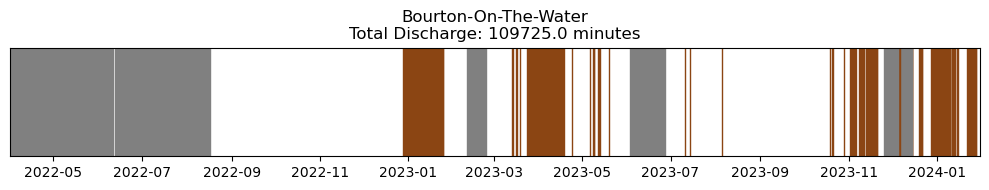

In [5]:
monitor.plot_history()

We can make it plot for a shorter period by passing a `since` parameter. For example, lets look at only the last 3 months.

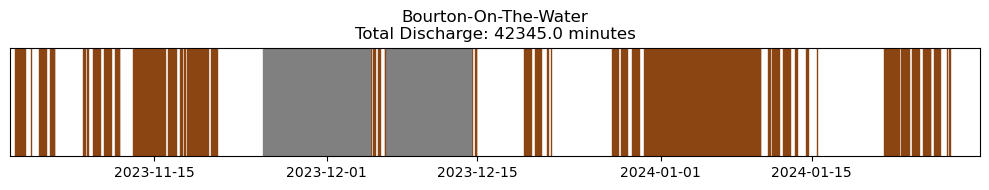

In [6]:
since_3_months = datetime.datetime.now() - datetime.timedelta(days=90) # 90 days = 3 months
monitor.plot_history(since=since_3_months)

We can print out some summary information about the total amount of discharge as follows:

In [7]:
print(f"Total discharge: {monitor.total_discharge()} minutes")
print(f"Total discharge last 12 months: {monitor.total_discharge_last_12_months()} minutes")
print(f"Total discharge last 6 months: {monitor.total_discharge_last_6_months()} minutes")
print(f"Total discharge since start of year: {monitor.total_discharge_since_start_of_year()} minutes")
print(f"Total discharge last 3 months: {monitor.total_discharge(since=since_3_months)} minutes")

Total discharge: 109725.0 minutes
Total discharge last 12 months: 74340.0 minutes
Total discharge last 6 months: 43605.0 minutes
Total discharge since start of year: 21165.0 minutes
Total discharge last 3 months: 42345.0 minutes


If we want to calculate the history for all monitors managed by a particular water company we can do this by calling the `set_all_histories()` method on the `WaterCompany` object. This sets the `history` attribute of all the monitors in the `WaterCompany` object.

In [8]:
tw.set_all_histories()

Requesting historical data for all monitors from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=2000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=3000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=4000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=5000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=6000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=7000
	Requesting fr

Then, the monitor's history object can be accessed as before. For example, lets get the history for the "Marlborough" monitor.

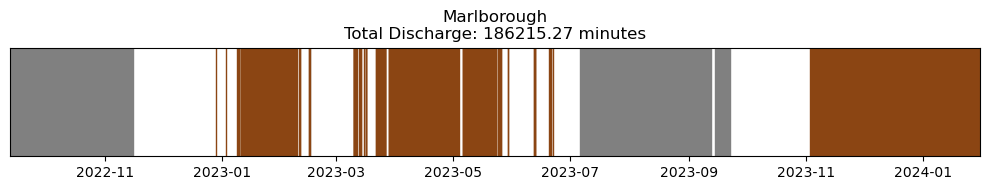

In [9]:
monitor = tw.active_monitors["Marlborough"]
monitor.plot_history()

Alternatively, we can get all of the discharge events in the form of a `pandas` dataframe using the `get_history_df()` method. This returns a dataframe that contains all the discharge events for all the monitors managed by the water company, sorted from newest to oldest start times. This dataframe can then be analysed using standard pandas methods. The columns of the dataframe are shown below:

In [10]:
df = tw.history_to_discharge_df()
print(df.columns.to_list())

Building output data-table
	Processing (Northern) Low Level No 1 Brook Green
	Processing [Coming Soon] Abbeydale Road
	Processing [Coming Soon] Alicia Avenue CSO
	Processing [Coming Soon] Alperton Lane
	Processing [Coming Soon] Banbury Rd Middleton Cheney
	Processing [Coming Soon] Bookham SPS
	Processing [Coming Soon] Boyne Avenue, Hendon
	Processing [Coming Soon] Brackner Road CSO 
	Processing [Coming Soon] Brent Cross Flyover
	Processing [Coming Soon] Brent Valley Golf Course, LB Ealing
	Processing [Coming Soon] Bridle Close, Ewell
	Processing [Coming Soon] Bucknell
	Processing [Coming Soon] Bute Street, Outside No 43 (PH)
	Processing [Coming Soon] Carlton Cres Jnc Blenheim Cres
	Processing [Coming Soon] Channelsea West Ham Lane PS 
	Processing [Coming Soon] Chigwell Road / Langston Road
	Processing [Coming Soon] Chigwell Road, Woodford Green
	Processing [Coming Soon] Chisledon Storm Tanks 
	Processing [Coming Soon] Church Road
	Processing [Coming Soon] Church Road/Brent Lodge Park (

/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:429: UserWarning: !WARNING! Event is ongoing and has no end time. Returning None.
  warnings.warn(
/home/alex/anaconda3/envs/working/lib/python3.10/site-packages/poopy/poopy.py:922: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, event._to_row()], ignore_index=True)


	Processing Brickendon
	Processing Brixton Storm Relief Sewer
	Processing Broadwell
	Processing Brockham Bridge
	Processing Brook Way, Chigwell
	Processing Broome (Attenuation Tank)
	Processing Bucklebury (Briff Lane)
	Processing Buntingford
	Processing Burford
	Processing Burghfield
	Processing Burstow
	Processing Bushey Court, Raynes Park
	Processing Byfield
	Processing Caddington
	Processing Cage End, Essex
	Processing Camberley
	Processing Canfield End, Little Canfield
	Processing Canfold Wood
	Processing Canterbury Road, Thornton Heath
	Processing Capel
	Processing Carterton
	Processing Cascade road storm tanks, buckhurst
	Processing Cassington
	Processing Castle Drive
	Processing Castle Gardens, Dorking
	Processing Chacombe
	Processing Chadlington
	Processing Chalgrove
	Processing Chapel Row (Berks)
	Processing Chapmore End
	Processing Charlbury
	Processing Charlton Storm Relief
	Processing Charlton-On-Otmoor
	Processing Charlwood, Surrey
	Processing Chelsea, London, Sw10
	Proces

This can then be saved to file using the standard Pandas methods. For example, to save it as a CSV file that can be analysed using other tools (e.g, Excel) we can do the following:

In [11]:
filename = tw.name + tw.history_timestamp.strftime("%y%m%d%H%M%S") + ".csv"
print(f"Saving history to {filename}")
df.to_csv(filename, header=True, index=False)

Saving history to ThamesWater240130150346.csv


Lets say we want to look at how CSO overflows have changed over time. Or perhaps how many monitors are online at any one time across a water companies patch. We can do this using the `get_monitor_timeseries()` method of a `WaterCompany`. This generates time series of the number of active CSOs, recently active CSOs and online monitors at 15 minute intervals (the approximate frequency of the data). Lets generate this data from the start of 2022.

In [12]:
since = datetime.datetime(2022, 1, 1)
monitor_series = tw.get_monitor_timeseries(since=since)

Processing (Northern) Low Level No 1 Brook Green
Processing [Coming Soon] Abbeydale Road
Monitor [Coming Soon] Abbeydale Road has no recorded events
Processing [Coming Soon] Alicia Avenue CSO
Monitor [Coming Soon] Alicia Avenue CSO has no recorded events
Processing [Coming Soon] Alperton Lane
Monitor [Coming Soon] Alperton Lane has no recorded events
Processing [Coming Soon] Banbury Rd Middleton Cheney
Monitor [Coming Soon] Banbury Rd Middleton Cheney has no recorded events
Processing [Coming Soon] Bookham SPS
Monitor [Coming Soon] Bookham SPS has no recorded events
Processing [Coming Soon] Boyne Avenue, Hendon
Monitor [Coming Soon] Boyne Avenue, Hendon has no recorded events
Processing [Coming Soon] Brackner Road CSO 
Monitor [Coming Soon] Brackner Road CSO  has no recorded events
Processing [Coming Soon] Brent Cross Flyover
Monitor [Coming Soon] Brent Cross Flyover has no recorded events
Processing [Coming Soon] Brent Valley Golf Course, LB Ealing
Monitor [Coming Soon] Brent Valley G

Now lets plot the results.

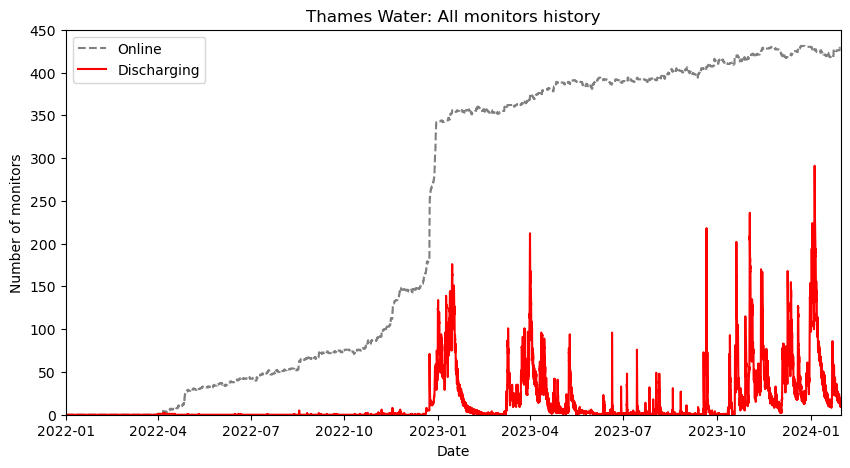

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_discharging"],
    c="red",
    label="Discharging",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 450)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Note that for "online" we conservatively assume that every monitor was _offline_ until we receive any positive event from it. This means that if a monitor is installed but recording    'NotDischarging' for a month until its first discharge event, it will be counted as offline for that month. Lacking any other information, this is the most conservative assumption we can make.  Since then, the coverage has got gradually better but the number of active monitors has remained fairly constant. As ecpected there are more CSOs active during the winter months. To get a more averaged (less 'spiky') view of the data we can look at those which have been active in the last 48 hours (shown below) but the overall picture is the same.

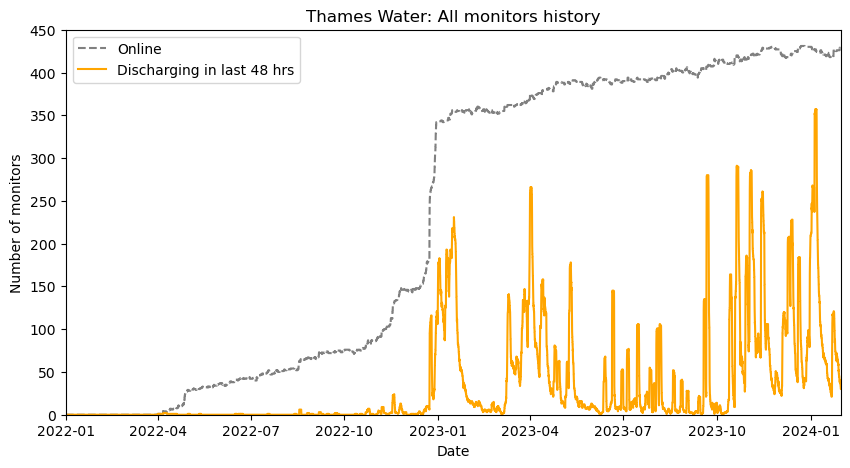

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_recently_discharging"],
    c="orange",
    label="Discharging in last 48 hrs",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 450)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Finally we can see how easy it is to generate some simple statistics about the data. For example:

In [15]:
number_online_now = monitor_series["number_online"].iloc[-1]
print(f"Number of monitors online now: {number_online_now}")
number_discharging_now = monitor_series["number_discharging"].iloc[-1]
print(f"Number of monitors discharging now: {number_discharging_now}")
print(f"Proportion of monitors discharging now: {number_discharging_now / number_online_now * 100:.2f}%")
number_recently_discharging_now = monitor_series["number_recently_discharging"].iloc[-1]
print(f"Number of monitors discharging in last 48 hrs: {number_recently_discharging_now}")
print(f"Proportion of monitors discharging in last 48 hrs: {number_recently_discharging_now / number_online_now * 100:.2f}%")

Number of monitors online now: 429
Number of monitors discharging now: 14
Proportion of monitors discharging now: 3.26%
Number of monitors discharging in last 48 hrs: 30
Proportion of monitors discharging in last 48 hrs: 6.99%
